# 评估空间异方差的局部模式

在下面的笔记本中，我们回顾了 [Ord 和 Getis (2012)](https://link.springer.com/article/10.1007/s00168-011-0492) 提出的局部空间异方差 (LOSH) 统计量 ($H_i$) -y）。 LOSH 旨在作为分析空间过程平均水平的本地统计数据的补充。 LOSH 侧重于分析空间过程的方差。

正如 Ord 和 Getis 所概述的，考虑 10 x 10 的属性值网格。 在这个网格中，有一个中心高租金区域（由单元格为 1 标识）和周围的低值区域（由单元格为 0 标识）。我们可以将这种空间排列可视化为：

|   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | 1 | 1 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | 1 | 1 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | 1 | 1 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | 1 | 1 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |

虽然我们可以看到高租金区的核心与其邻居具有相似的值（即 1 的单元格被其他 1 的单元格包围），但当我们考虑高租金区的外缘时，情况就不那么正确了 。 该边缘代表稳定的内部高租金区域和稳定的外部低价值区域之间可能的过渡区域。 Ord 和 Getis 寻求使用 LOSH 统计数据 ($H_i$) 来识别两个区域之间的过渡区域。

# 了解 LOSH 统计数据

Ord 和 Getis 首先定义局部均值 $\bar{x}_i (d)$，作为其 $G^*_i$ 统计量的重新缩放形式。 这个局部平均值是：

等式。 1 $$ \bar{x}_i (d) = \frac{\sum_j w_{ij} (d) x_j}{\sum_j w_{ij}(d)} $$

定义了局部均值后，我们可以将局部残差理解为局部单位的值减去局部均值，或者：

等式。 2 $$ e_j(d) = x_j - \bar{x}_i(d), j \in N(i,d) $$

这些局部残差可以合并到方程中。 1 形成最终的局部色散统计量，称为 $H_i$：

等式。 3 $$H_i(d) = \frac{\sum w_{ij}(d) |e_j(d)|^a}{\sum w_{ij}(d)}$$

请注意添加了一个新变量 $a$。 这处理残差的解释。 正如 Ord 和 Getis 所解释的：

> 当 a = 1 时，我们有一个绝对偏差度量 Hi 1，当 a = 2 时有一个方差度量 Hi2。 显然，其他选择以及各种稳健的形式也是可能的，以避免异常值。 为了产生标准度量，我们应该除以整个数据集的平均绝对偏差或方差。

`losh()`函数的默认设置为$a=2$。

# 解释 LOSH 统计数据

Ord and Getis suggest that the $H_i$ statistic may benefit from interpretation with the $G^*_i$ statistic. The logic of this combined interpretation is that a the $G^*_i$ value speaks to the local mean of the phenomenon of interest, whereas the $H_i$ speaks to the local heterogeneity. Ord and Getis provide the following table as a simplified guide for interpretation:

| Mean\variance     | High $H_i$                                                                    | Low $H_i$                                                                                                                      |
|-------------------|-------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------|
| Large $|G^*_i|$ | A hot spot with <br> heterogeneous local conditions                                | A hot spot with similar surrounding areas; <br> the map would indicate whether the <br> affected region is larger than the single 'cell' |
| Small $|G^*_i|$ | Heterogeneous local conditions but <br> at a low average level (an unlikely event) | Homogeneous local conditions <br> and a low average level                                                                           |
|                   |                                                                               |                                                                                                                                |

# LOSH 统计的推断

LOSH 统计的 PySAL 实现中的当前推断使用 $\chi^2$ 分布。 对于每个单元，我们计算 Z 分数：

$$ Z_i = 2H_i / V_i $$

自由度为 $2/V_i$。 $V_i$ 是单位的局部方差，计算公式为：

$$ Var_{p}(H_i) = \frac{1}{n-1} \left( \frac{1}{h_1 W_{i1}}\right) ^2 (h_2 - h_1^2) \left[ nW_{i2} - W_{i1}^2\right] $$

值得注意的是， [Xu et al (2014).](https://ideas.repec.org/a/spr/anresc/v52y2014i3p697-710.html) 中提出了替代的推理方法。 尚未在 PySAL 中实现，它们可在“R”“spdep”包中作为“LOSH.mc”使用。 PySAL 函数与“spdep”、“LOSH”和“LOSH.cs”函数相当。

# 在数据集上应用 LOSH 统计数据

作为比较，我们现在在 [Boston Housing 数据集](https://geodacenter.github.io/data-and-lab//boston-housing/) 上演示 PySAL `losh` 函数，该函数也用于 如“R”“spdep”“LOSH.cs”中的文档示例。 我们对变量“NOX”感兴趣，它是“...每个城镇一氧化氮浓度（千万分之一）的向量”。

我们首先从“libpysal”加载“Bostonhsg”示例数据集：

In [1]:
import libpysal
import geopandas
boston = libpysal.examples.load_example('Bostonhsg')
boston_ds = geopandas.read_file(boston.get_path('boston.shp'))

然后我们构造一个Queen权重结构：

In [2]:
w = libpysal.weights.Queen.from_dataframe(boston_ds)

d:\work\miniconda3\envs\esda\lib\site-packages\libpysal\cg\voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
d:\work\miniconda3\envs\esda\lib\site-packages\libpysal\cg\voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()

我们现在可以导入“losh()”函数。 请注意，它采用 scikit-learn 类型估计器的形式，因此我们传递一系列参数，然后调用“.fit()”。

In [3]:
from esda.losh import LOSH
ls = LOSH(connectivity=w, inference="chi-square").fit(boston_ds['NOX'])

我们现在可以检查 LOSH ($H_i$) 值及其意义。

In [4]:
ls.Hi[0:10]

array([0.19690679, 0.51765774, 0.80382881, 0.80854441, 0.530667  ,
       0.525579  , 0.83291425, 0.84215733, 0.48875154, 0.41955327])

In [5]:
ls.pval[0:10]

array([0.86292242, 0.61157688, 0.45697742, 0.34426167, 0.57934554,
       0.55430556, 0.4135546 , 0.40999792, 0.54025022, 0.57801529])

如果我们想要映射 LOSH ($H_i$) 值，我们需要将它们添加回“boston_ds”数据帧。

In [6]:
boston_ds['Hi'] = ls.Hi
boston_ds['Hi_pval'] = ls.pval

我们现在可以映射 LOSH ($H_i$) 值。 请注意，出于可视化目的，我们在这里选择分位数分隔方案。

<Axes: >

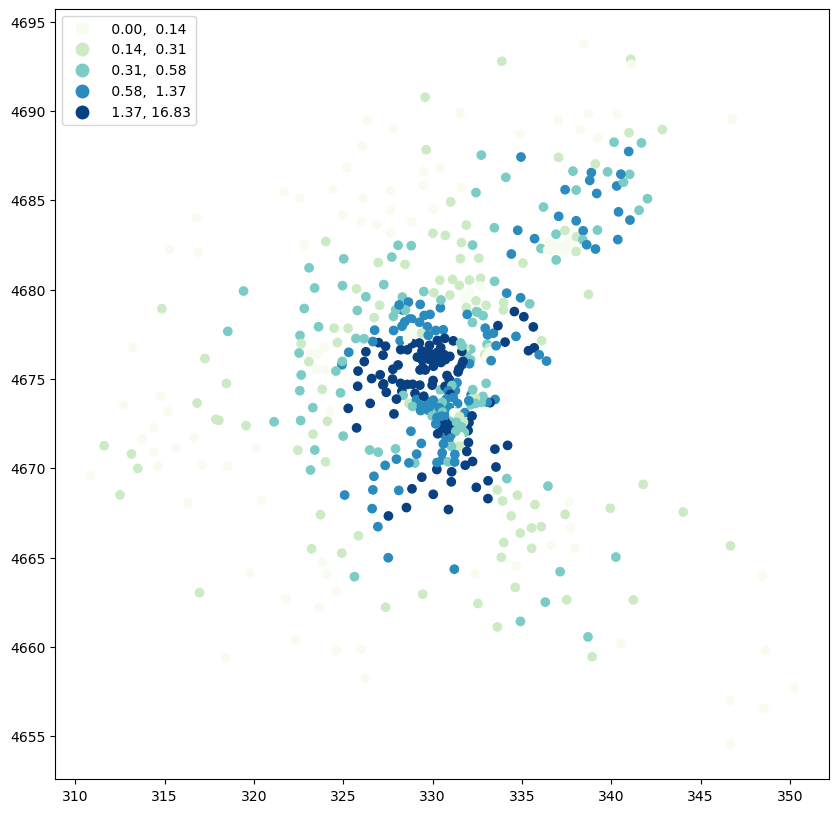

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
boston_ds.plot(column='Hi', scheme='Quantiles', 
               k=5, cmap='GnBu', 
               legend=True, ax=ax)

我们还可以检查这些值的重要性。 我们使用 0.01、0.05、0.10 和 0.10 以上的截断值。

<Axes: >

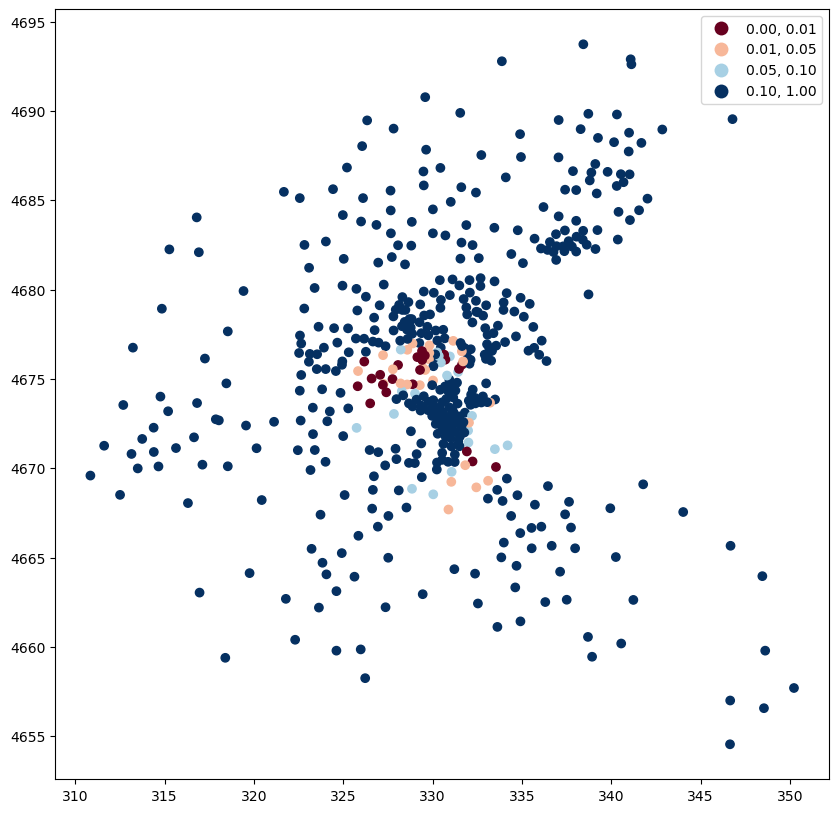

In [8]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
boston_ds.plot(column='Hi_pval', cmap='RdBu', 
               legend=True, ax=ax, 
               scheme='user_defined', 
               classification_kwds={'bins':[0.01, 0.05, 0.10, 1]})